<a href="https://colab.research.google.com/github/dubeyabhi07/hands-on-scikit-learn/blob/master/dimensionalityReduction/kernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel PCA :
 - For some data it is not possible to reduce dimentions using liniear PCA. For the following example, even after the PCA, data points are inseparable.

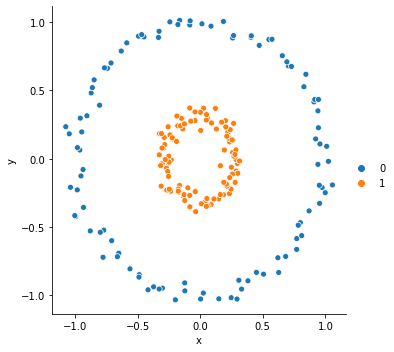

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)
X, y = make_circles(n_samples=200, factor=.3, noise=.04)

X_df = pd.DataFrame(X,columns=['x','y'])
sns.relplot(x='x', y='y', data=X_df,hue=y)

[0.50158672 0.49841328]


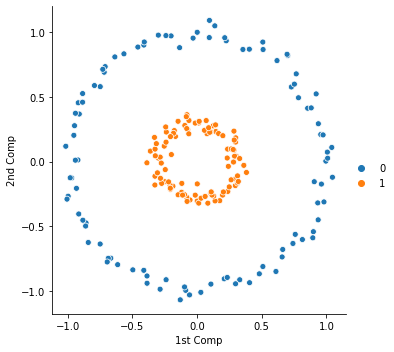

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca,columns=['1st Comp','2nd Comp'])
print(pca.explained_variance_ratio_)
sns.relplot(x='1st Comp', y='2nd Comp', data=X_pca_df,hue=y)

- Applying various kernels and checking wheather data becomes liniearly separable. Also utilising only the 1st and 2nd principal components.

In [ ]:
kPcaRbf = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=1)
X_kPcaRbf = kPcaRbf.fit_transform(X)
print(X_kPcaRbf.shape)


kPcaPoly = KernelPCA(kernel="poly",degree = 3,fit_inverse_transform=True, gamma=3)
X_kPcaPoly = kPcaPoly.fit_transform(X)
print(X_kPcaPoly.shape)


kPcaCosine = KernelPCA(kernel="cosine",fit_inverse_transform=True, gamma=100)
X_kPcaCosine = kPcaCosine.fit_transform(X)
print(X_kPcaCosine.shape)

(200, 85)
(200, 9)
(200, 2)


Text(0.5, 0.98, 'cosine kernel')

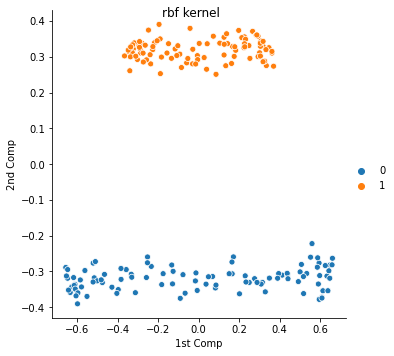

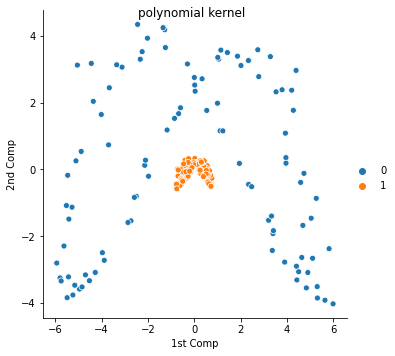

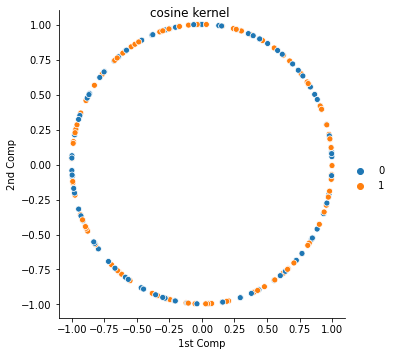

In [ ]:
X_kPcaRbf_df = pd.DataFrame(X_kPcaRbf[:,1:3],columns=['1st Comp','2nd Comp'])
p1 = sns.relplot(x='1st Comp', y='2nd Comp', data=X_kPcaRbf_df,hue=y)
p1.fig.suptitle('rbf kernel')

X_kPcaPoly_df = pd.DataFrame(X_kPcaPoly[:,1:3],columns=['1st Comp','2nd Comp'])
p2 = sns.relplot(x='1st Comp', y='2nd Comp', data=X_kPcaPoly_df,hue=y)
p2.fig.suptitle('polynomial kernel')

X_kPcaCosine_df = pd.DataFrame(X_kPcaCosine,columns=['1st Comp','2nd Comp'])
p3= sns.relplot(x='1st Comp', y='2nd Comp', data=X_kPcaCosine_df,hue=y)
p3.fig.suptitle('cosine kernel')

- Getting the original data back from PCA tranformations

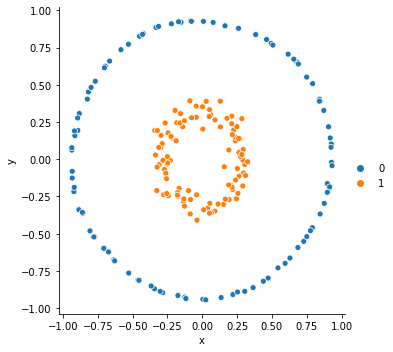

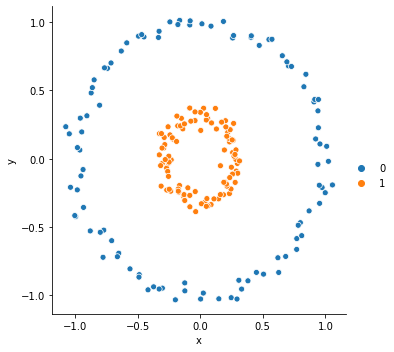

In [ ]:
X_backRbf = kPcaRbf.inverse_transform(X_kPcaRbf) # only 2d
X_backRbf_df = pd.DataFrame(X_backRbf,columns=['x','y'])
sns.relplot(x='x', y='y', data=X_backRbf_df,hue=y)

X_backPoly = kPcaPoly.inverse_transform(X_kPcaPoly) # only 2d
X_backPoly_df = pd.DataFrame(X_backPoly,columns=['x','y'])
sns.relplot(x='x', y='y', data=X_backPoly_df,hue=y)